In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [4]:
# loasd the dataset
df = pd.read_excel('clean.xlsx')

In [5]:
# Display the first few rows of the dataset
df.head(5)

,location,house_type,bedrooms,parking_space,land_size,condition,proximity_to_roads,price
0,Victoria Island,Detached duplex,5,1,610,Old,82,200000000
1,Lekki,Terraced Duplex,3,2,360,Old,66,80000000
2,Ikeja,Apartment,2,1,200,Renovated,71,50000000
3,Victoria Island,Detached duplex,3,3,696,Renovated,161,190000000
4,Others,Semi-Detached,4,2,277,New,72,70000000


In [9]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            105 non-null    object
 1   house_type          105 non-null    object
 2   bedrooms            105 non-null    int64 
 3   parking_space       105 non-null    int64 
 4   land_size           105 non-null    int64 
 5   condition           105 non-null    object
 6   proximity_to_roads  105 non-null    int64 
 7   price               105 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.7+ KB


`Statistical Analysis`

In [10]:
# check for null values and duplicates
df.isnull().sum()

location              0
house_type            0
bedrooms              0
parking_space         0
land_size             0
condition             0
proximity_to_roads    0
price                 0
dtype: int64

In [6]:
# check house type count
df["house_type"].value_counts()

house_type
Terraced Duplex    29
Semi-Detached      24
Detached duplex    21
Apartment          19
Bungalow           12
Name: count, dtype: int64

In [7]:
# check condition count
df["condition"].value_counts()

condition
Old          40
New          34
Renovated    31
Name: count, dtype: int64

In [8]:
# check location count
df["location"].value_counts()

location
Ikoyi              16
Others             14
Yaba               14
Victoria Island    13
Surulere           13
Lekki              12
Ajah               12
Ikeja              11
Name: count, dtype: int64

In [11]:
# short stats summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,105.0,2.828571e+00,8.710862e-01,1.0,2.0,3.0,3.0,5.0
parking_space,105.0,1.866667e+00,8.328204e-01,0.0,1.0,2.0,2.0,4.0
land_size,105.0,5.101524e+02,1.986586e+02,200.0,327.0,504.0,673.0,897.0
proximity_to_roads,105.0,1.729143e+02,7.308348e+01,50.0,108.0,173.0,233.0,299.0
price,105.0,1.122667e+08,7.769037e+07,45000000.0,73000000.0,90000000.0,120000000.0,650000000.0


`Exploratory Data Analysis`

In [12]:
# group by house tye and aggregate by average price
house_type_price = df.groupby('house_type')['price'].mean().sort_values(ascending=False)
house_type_price

house_type
Detached duplex    1.406190e+08
Terraced Duplex    1.163793e+08
Apartment          1.036842e+08
Bungalow           9.783333e+07
Semi-Detached      9.650000e+07
Name: price, dtype: float64

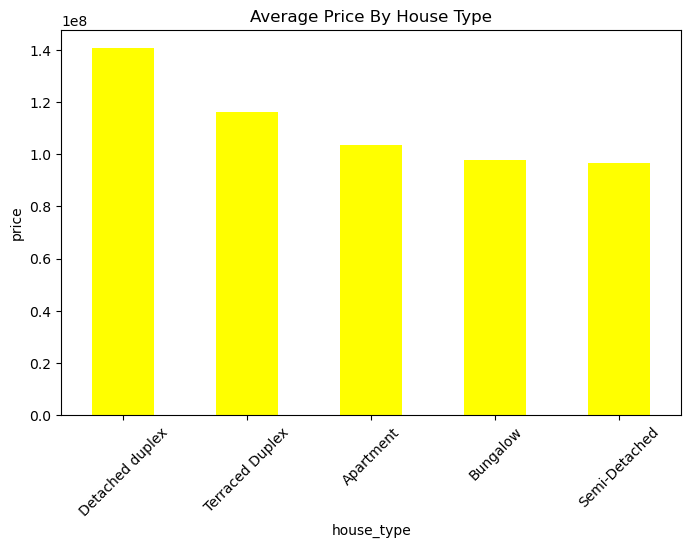

In [13]:
# adjust fig size and plot
plt.figure(figsize=(8,5))
house_type_price.plot(kind = 'bar', x='house_type', y='price', color='yellow')
plt.xlabel('house_type')
plt.ylabel('price')
plt.title('Average Price By House Type')
plt.xticks(rotation=45)
plt.show()

In [14]:
# group by location and aggregate by average price
location_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
location_price

location
Ikoyi              2.045625e+08
Victoria Island    1.490769e+08
Yaba               1.150000e+08
Lekki              9.500000e+07
Ajah               9.258333e+07
Ikeja              8.263636e+07
Surulere           7.084615e+07
Others             6.328571e+07
Name: price, dtype: float64

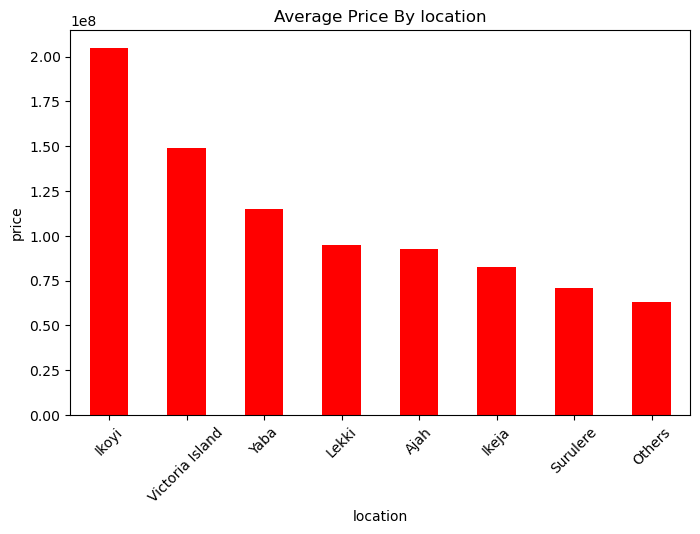

In [15]:
# plot the visuals 
# adjust fig size
plt.figure(figsize=(8,5))
location_price.plot(kind = 'bar', x='location', y='price', color='red')
plt.xlabel('location')
plt.ylabel('price')
plt.title('Average Price By location')
plt.xticks(rotation=45)
plt.show()

In [19]:
# group by condition and aggregate by average price
condition_price = df.groupby('condition')['price'].mean().sort_values(ascending=False)
condition_price

condition
Renovated    1.388710e+08
New          1.037941e+08
Old          9.885000e+07
Name: price, dtype: float64

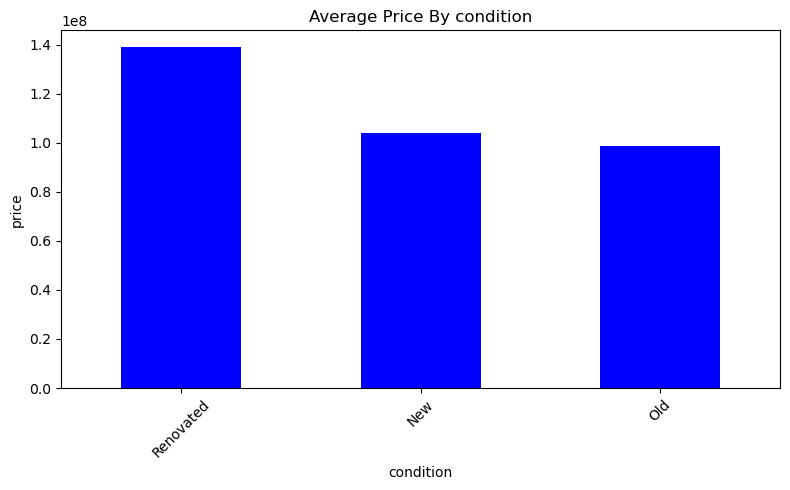

In [17]:
# plot the visuals 
plt.figure(figsize=(8,5))
condition_price.plot(kind = 'bar', x='condition', y='price', color='blue')
plt.xlabel('condition')
plt.ylabel('price')
plt.title('Average Price By condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# load cleaned transformed data
data = pd.read_excel("cleant.xlsx")
# the data above have some maped cat features 
# condition={new:1,renovated:2,old:3}
# house_type={detached duplex:1,semi-detached:2,terraced duplex:3,apartment:4,bungalow:5}
#location={ikoyi:1,victoria island:2,lekki:3,ajah:4,ikeja:5,yaba:6,surulere:7,others:8}

<Axes: >

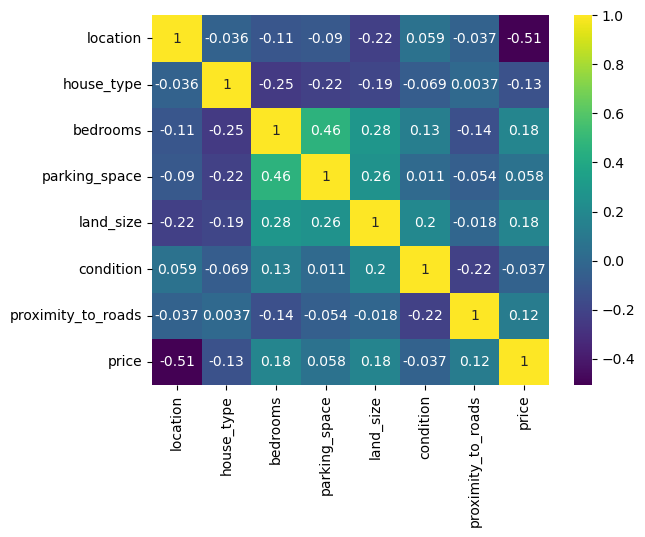

In [21]:
# corellation analysis with heatmap
corl = data.corr()
# plot the heatmap rel
sns.heatmap(data=corl, annot=True,cmap="viridis")

`Preprocess Text or Data Training`

In [ ]:
# separate features target and dependent cols
X = df.drop('price', axis = 1)
y = df['price']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (84, 7), y_train shape: (84,)


In [24]:
# use random forest regressor in a pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

# specify the pipeline with OneHotEncoder and RandomForestRegressor
pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse_output=False),
    RandomForestRegressor(
        n_estimators=200,      # Number of trees
        max_depth=10,          # Maximum depth of trees
        min_samples_split=5,   # Minimum samples to split a node
        random_state=42
    )
)

In [25]:
# teach the model
pipeline.fit(X_train, y_train)

,steps,"[('onehotencoder', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None


In [26]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# make predictions on the test set
y_pred = pipeline.predict(X_test)
# make predictions on the training set
y_pred_train = pipeline.predict(X_train)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")
print(f"Test R^2 Score: {r2}")
print(f"Test Mean Absolute Error: {mae}")

# training metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R^2 Score: {r2_train}")
print(f"Train Mean Absolute Error: {mae_train}")

Test Mean Squared Error: 1150288970295439.5
Test R^2 Score: 0.5204002648171155
Test Mean Absolute Error: 22239935.558581308
Train Mean Squared Error: 873070743493692.4
Train R^2 Score: 0.872788482801227
Train Mean Absolute Error: 13020310.765588457


In [28]:
# make new prediction with new input data
pipeline.predict([["Yaba","Apartment",2,1,342,"New",126]])

c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([63896908.51027548])

In [ ]:
# save the model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(pipeline,file)